1) Нормализовать базу данных
2) Определить частотность коллокаций или n-gramm (можно и то и то как варик)
3) Создать dashboard

In [ ]:
import nltk
import numpy as np
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Топ-20 самых частых биграмм:
times india: 626
news times: 457
supreme court: 407
rahul gandhi: 353
year old: 349
lok sabha: 316
high court: 268
need help: 230
india news: 212
electoral bonds: 210
please help: 177
tamil nadu: 170
need advice: 169
narendra modi: 163
arvind kejriwal: 143
amit shah: 118
social media: 113
india india: 113
uttar pradesh: 106
madhya pradesh: 97

Топ-15 самых частых триграмм:
news times india: 457
india news times: 179
lok sabha elections: 69
lok sabha polls: 62
year old girl: 54
delhi high court: 46
times india india: 42
bombay high court: 39
lok sabha election: 39
one nation one: 33
bharat jodo nyay: 31
jodo nyay yatra: 31
news indian express: 30
bengaluru news times: 29
jai shri ram: 27

Общее количество биграмм: 208881
Общее количество триграмм: 255510


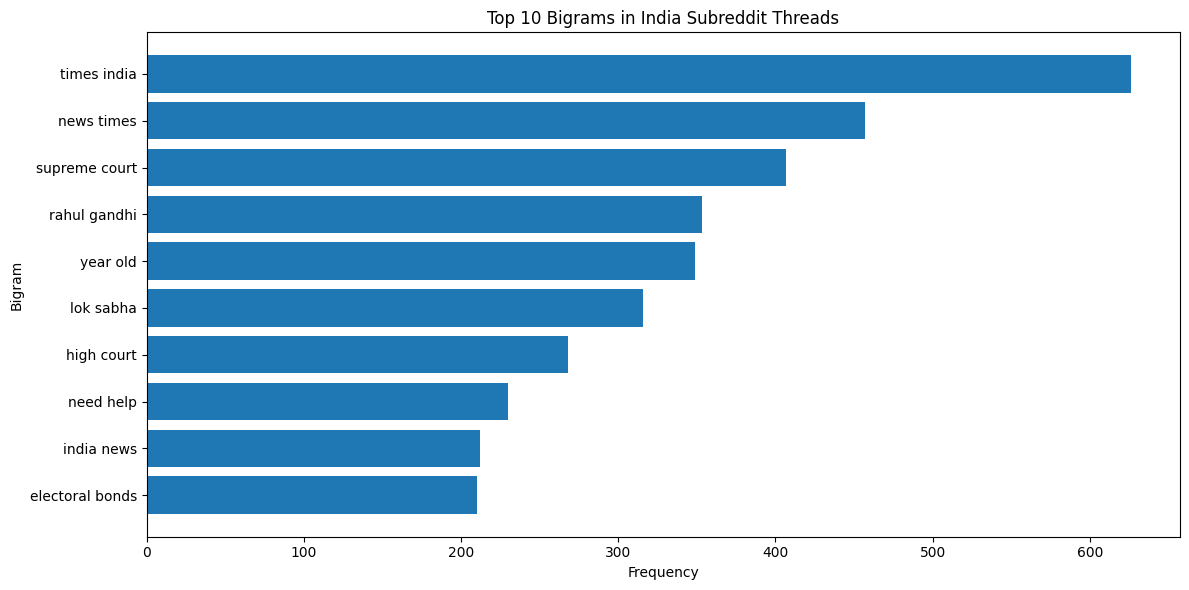

In [ ]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

df_t = pd.read_csv('india_subreddit_threads.csv')

stop_words = set(stopwords.words('english'))

def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

titles = df_t['title'].tolist()
normalized_titles = [normalize_text(title) for title in titles]
normalized_titles_string = ' '.join(normalized_titles)

# Разбиваем текст на слова и фильтруем стоп-слова
words = normalized_titles_string.split()
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

# Функция для создания n-грамм (коллокаций)
def get_ngrams(words, n=2):
    return list(zip(*[words[i:] for i in range(n)]))

# Создаем биграммы (пары слов)
bigrams = get_ngrams(filtered_words, 2)

# Считаем частотность биграмм
bigram_freq = Counter(bigrams)

# Выводим 20 самых частых биграмм
print("Топ-20 самых частых биграмм:")
for bigram, count in bigram_freq.most_common(20):
    print(f"{' '.join(bigram)}: {count}")

# Анализ для триграмм
trigrams = get_ngrams(filtered_words, 3)
trigram_freq = Counter(trigrams)

print("\nТоп-15 самых частых триграмм:")
for trigram, count in trigram_freq.most_common(15):
    print(f"{' '.join(trigram)}: {count}")

# Дополнительный анализ: создаем DataFrame для дальнейшей работы
bigram_df = pd.DataFrame(bigram_freq.most_common(), columns=['bigram', 'frequency'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

trigram_df = pd.DataFrame(trigram_freq.most_common(), columns=['trigram', 'frequency'])
trigram_df['trigram'] = trigram_df['trigram'].apply(lambda x: ' '.join(x))

# Сохраняем результаты в CSV файлы
bigram_df.to_csv('bigram_frequency.csv', index=False)
trigram_df.to_csv('trigram_frequency.csv', index=False)

print(f"\nОбщее количество биграмм: {len(bigram_df)}")
print(f"Общее количество триграмм: {len(trigram_df)}")

# Визуализация топ-10 биграмм
import matplotlib.pyplot as plt

top_bigrams = bigram_df.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_bigrams['bigram'], top_bigrams['frequency'])
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 10 Bigrams in India Subreddit Threads')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_bigrams.png', dpi=300)
plt.show()

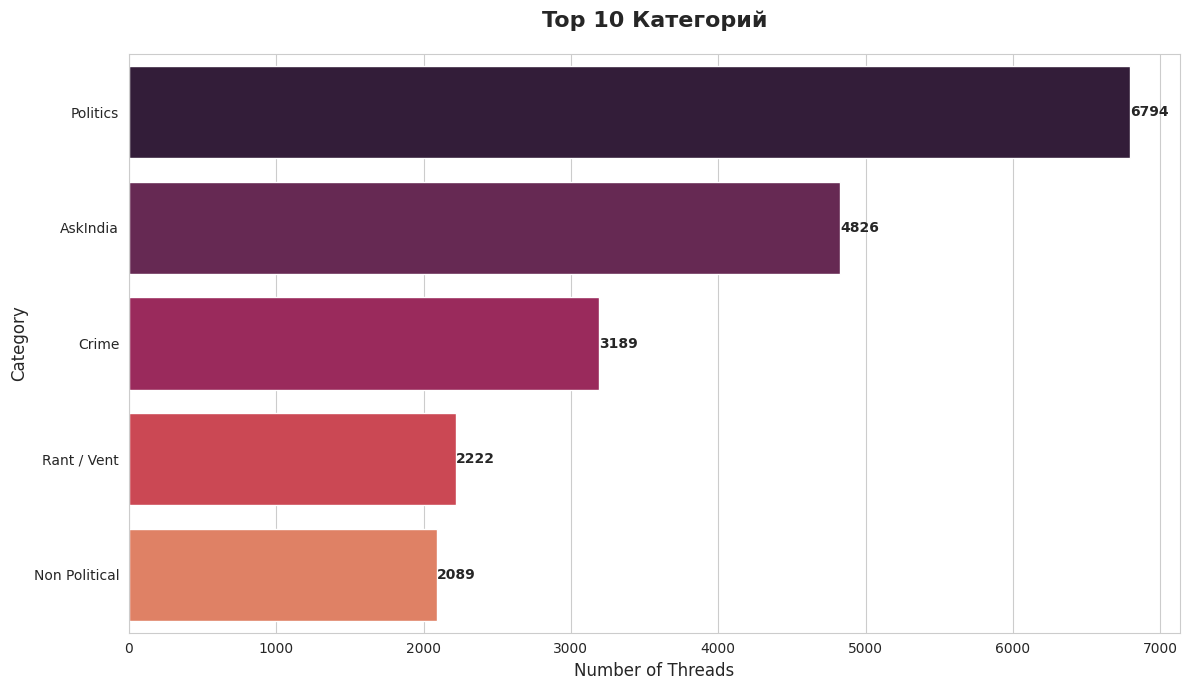

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('india_subreddit_threads.csv')

top_flairs = df['link_flair_text'].value_counts().head(10)

plot_data = top_flairs.reset_index()
plot_data.columns = ['link_flair_text', 'count']

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.set_palette("rocket")

barplot = sns.barplot(
    data=plot_data,
    x='count',
    y='link_flair_text',
    hue='link_flair_text',
    dodge=False,
    legend=False
)

for i, (value, name) in enumerate(zip(plot_data['count'], plot_data['link_flair_text'])):
    barplot.text(value + 0.5, i, f'{value}', va='center', fontweight='bold')

plt.title('Top 10 Категорий', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel(
  'Category', fontsize=12)
plt.tight_layout()

plt.show()

#Тут я поменьше категорий сделал, чтоб посмотреть просто

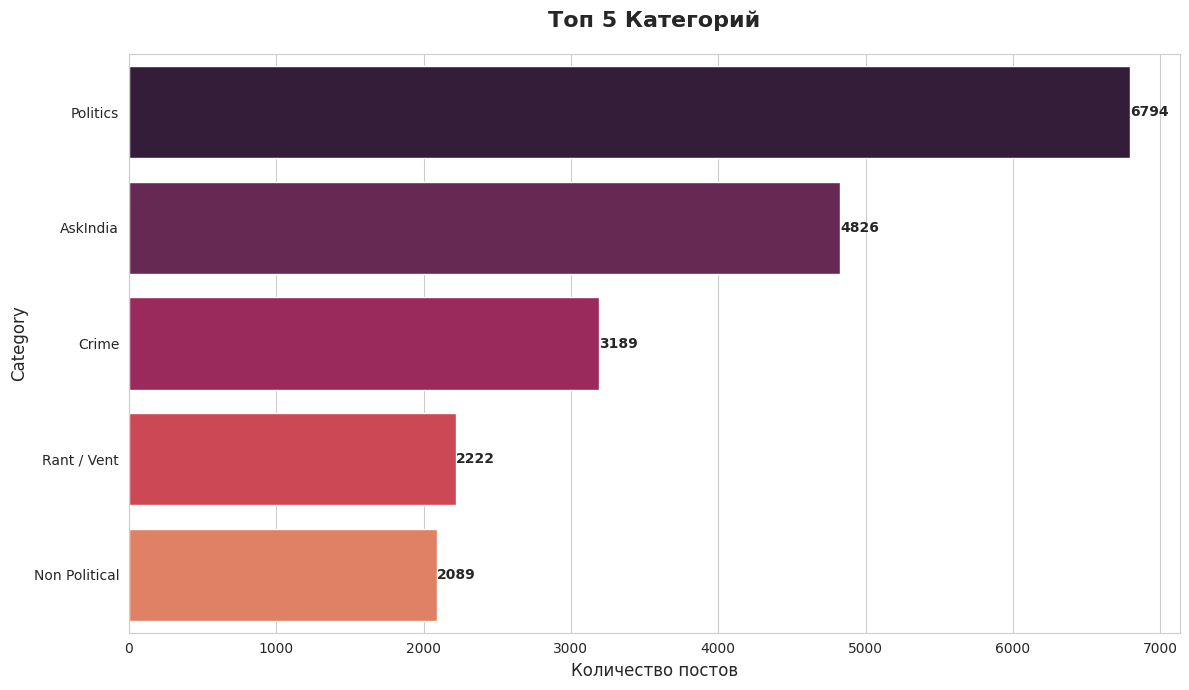

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('india_subreddit_threads.csv')

top_flairs = df['link_flair_text'].value_counts().head(5)

plot_data = top_flairs.reset_index()
plot_data.columns = ['link_flair_text', 'count']

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.set_palette("rocket")

barplot = sns.barplot(
    data=plot_data,
    x='count',
    y='link_flair_text',
    hue='link_flair_text',
    dodge=False,
    legend=False
)

for i, (value, name) in enumerate(zip(plot_data['count'], plot_data['link_flair_text'])):
    barplot.text(value + 0.5, i, f'{value}', va='center', fontweight='bold')

plt.title('Топ 5 Категорий', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Количество постов', fontsize=12)
plt.ylabel(
  'Category', fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

category_ngram_data = {}

top_flairs = df['link_flair_text'].value_counts().head(5)

print("Анализ N-грамм для 5 самых популярных катеогрий")

for category in top_flairs.index:
    print(f"\nКатегория: {category}")
    print("*" * 35)

    category_df = df[df['link_flair_text'] == category]

    category_titles = category_df['title'].tolist()
    normalized_category_titles = [normalize_text(title) for title in category_titles]
    normalized_category_titles_string = ' '.join(normalized_category_titles)

    words = normalized_category_titles_string.split()
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

     # Биграммы
    bigrams = get_ngrams(filtered_words, 2)
    bigram_freq = Counter(bigrams)
    top_10_bigrams = bigram_freq.most_common(10)

    bigram_df_category = pd.DataFrame(top_10_bigrams, columns=['bigram', 'frequency'])
    bigram_df_category['bigram'] = bigram_df_category['bigram'].apply(lambda x: ' '.join(x))

    print("Топ 10 Биграмм:")
    for bigram, count in top_10_bigrams:
        print(f"{' '.join(bigram)}: {count}")

    # Триграммы
    trigrams = get_ngrams(filtered_words, 3)
    trigram_freq = Counter(trigrams)
    top_10_trigrams = trigram_freq.most_common(10)

    trigram_df_category = pd.DataFrame(top_10_trigrams, columns=['trigram', 'frequency'])
    trigram_df_category['trigram'] = trigram_df_category['trigram'].apply(lambda x: ' '.join(x))

    print("\nТоп 10 Триграмм:")
    for trigram, count in top_10_trigrams:
        print(f"{' '.join(trigram)}: {count}")
    category_ngram_data[category] = {'bigrams': bigram_df_category, 'trigrams': trigram_df_category}


Анализ N-грамм для 5 самых популярных катеогрий

Категория: Politics
***********************************
Топ 10 Биграмм:
rahul gandhi: 315
lok sabha: 273
times india: 144
narendra modi: 129
electoral bonds: 128
news times: 117
arvind kejriwal: 106
amit shah: 94
india news: 85
supreme court: 80

Топ 10 Триграмм:
news times india: 117
india news times: 72
lok sabha elections: 61
lok sabha polls: 55
lok sabha election: 36
bharat jodo nyay: 31
jodo nyay yatra: 31
one nation one: 26
sabha elections 2024: 26
nation one election: 22

Категория: AskIndia
***********************************
Топ 10 Биграмм:
need help: 119
need advice: 85
please help: 80
help needed: 33
seeking advice: 30
got scammed: 24
urgent help: 23
rich cousins: 23
year old: 21
cousins mentally: 20

Топ 10 Триграмм:
rich cousins mentally: 20
mentally harrasing rich: 15
harrasing rich cousins: 15
cousins mentally harrasing: 14
urgent help needed: 12
need help regarding: 10
need advice regarding: 8
cousins mentally disturbing:

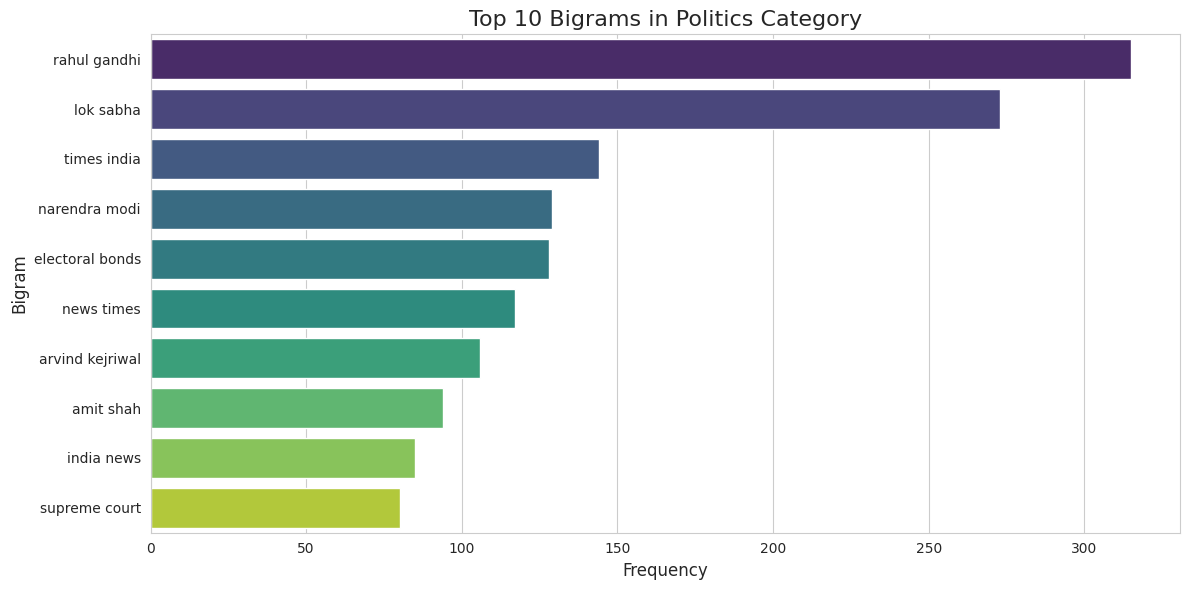

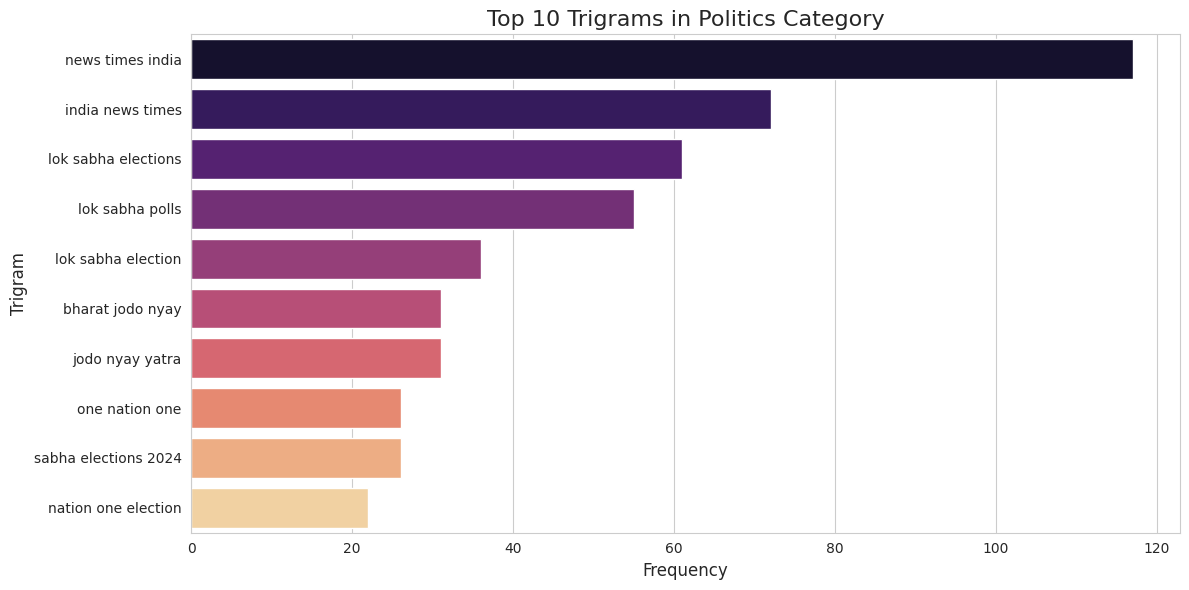

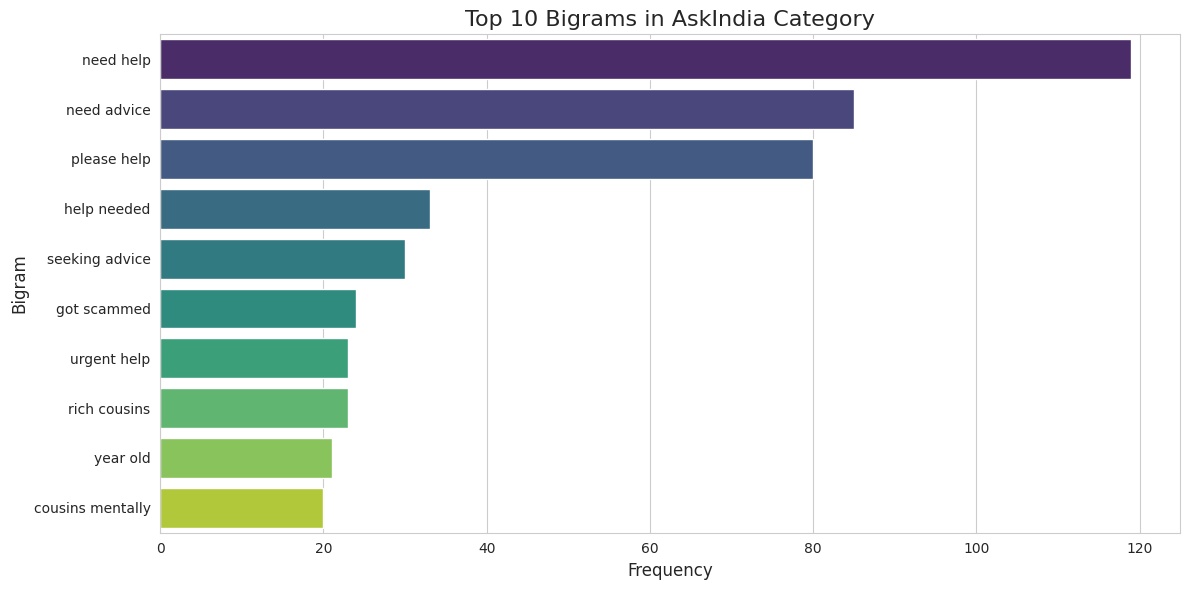

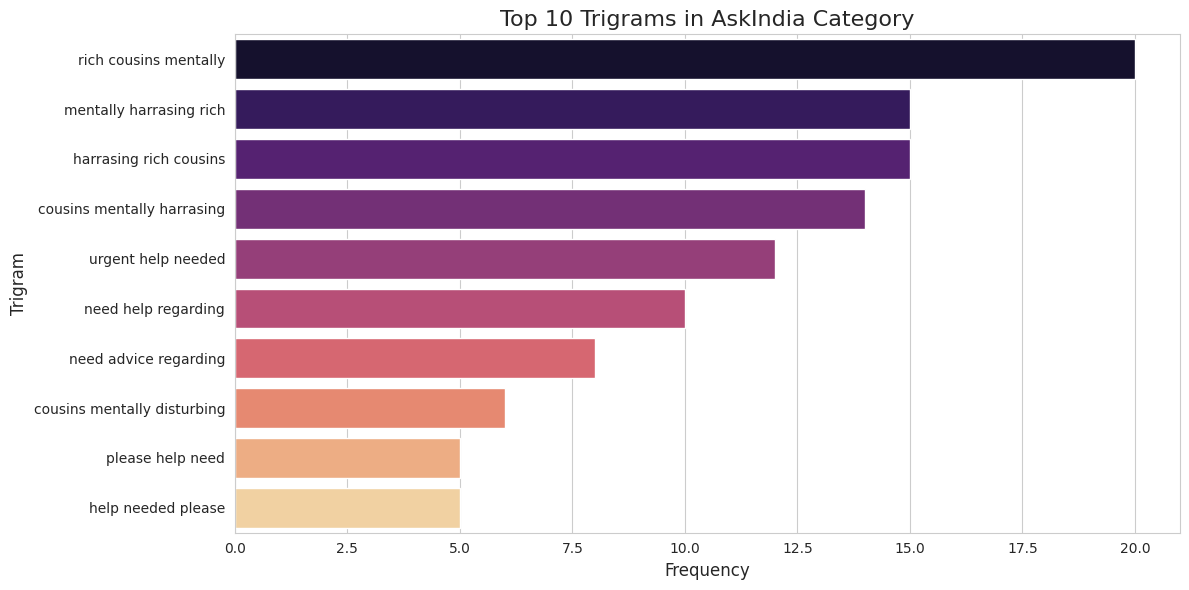

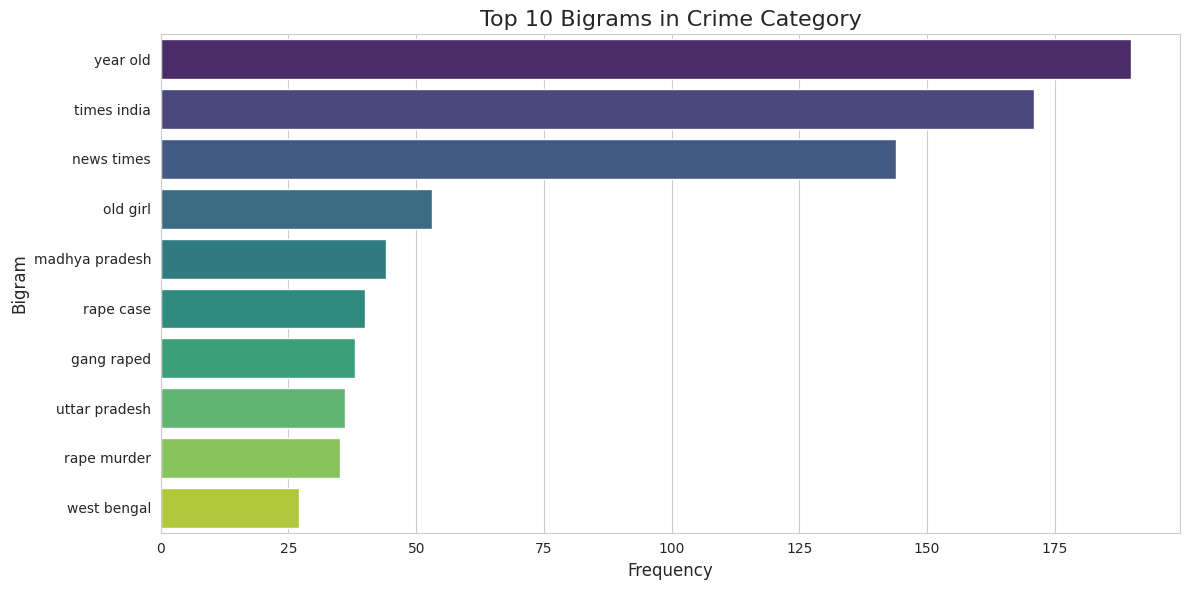

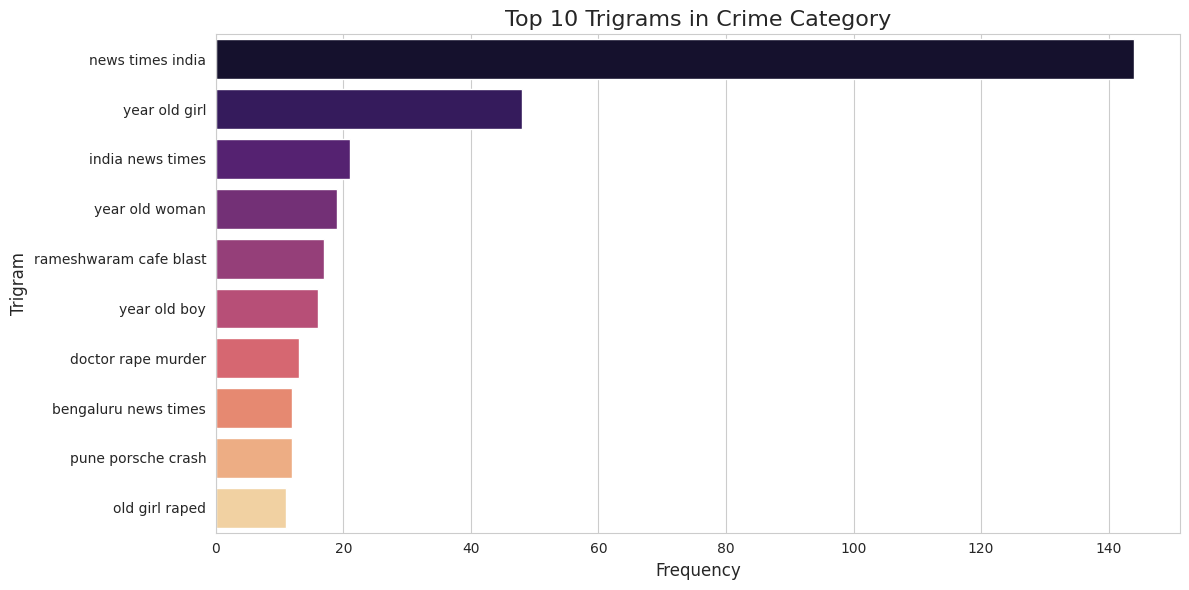

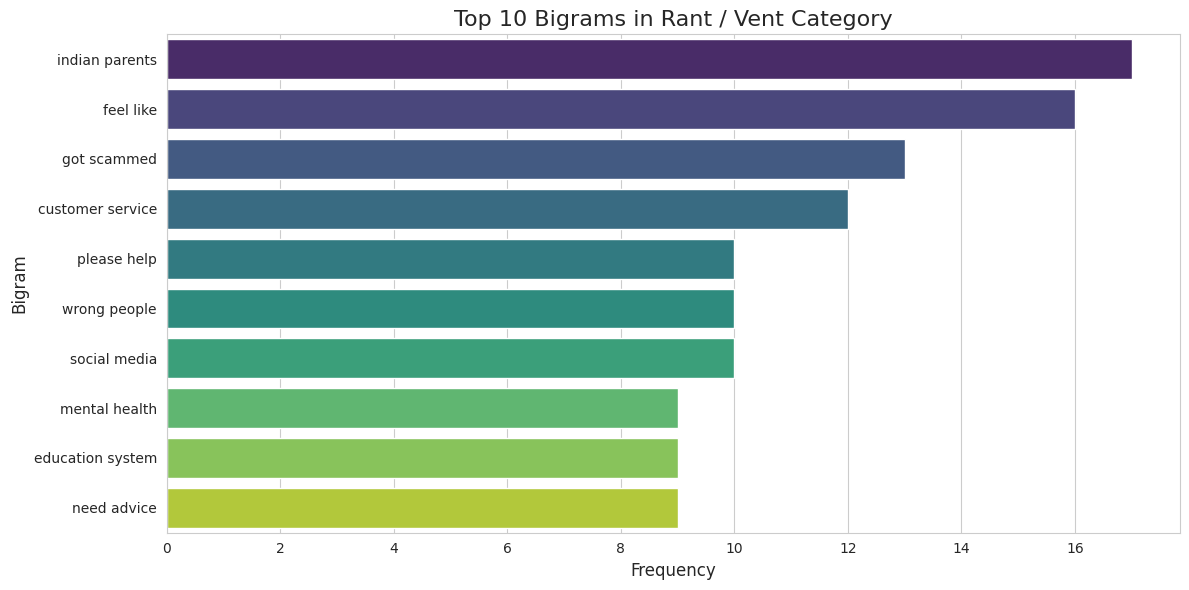

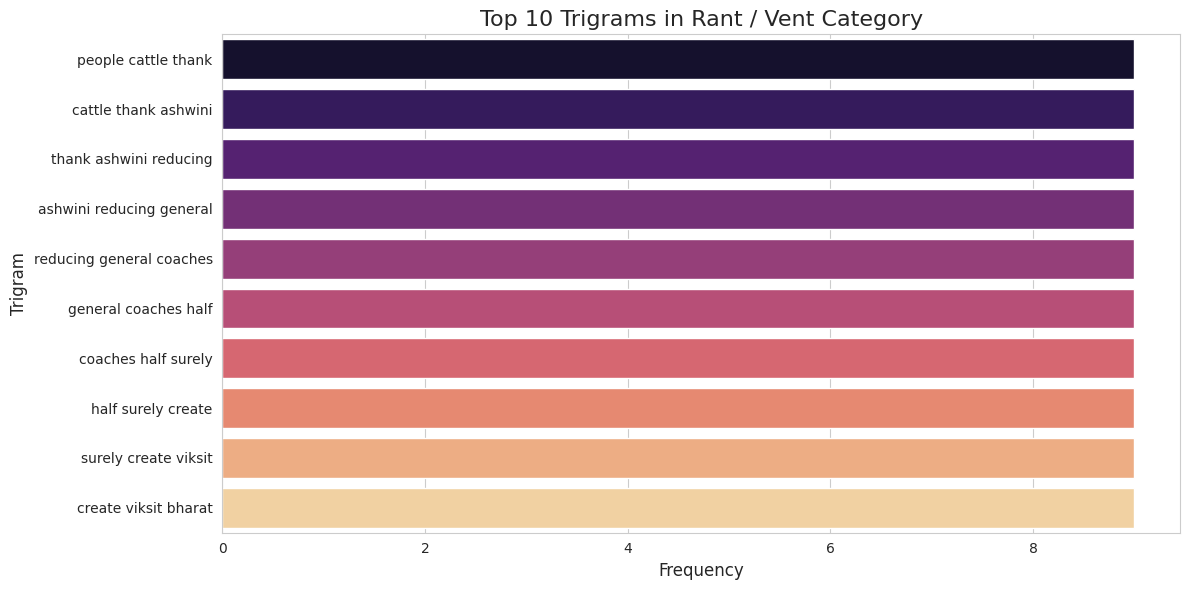

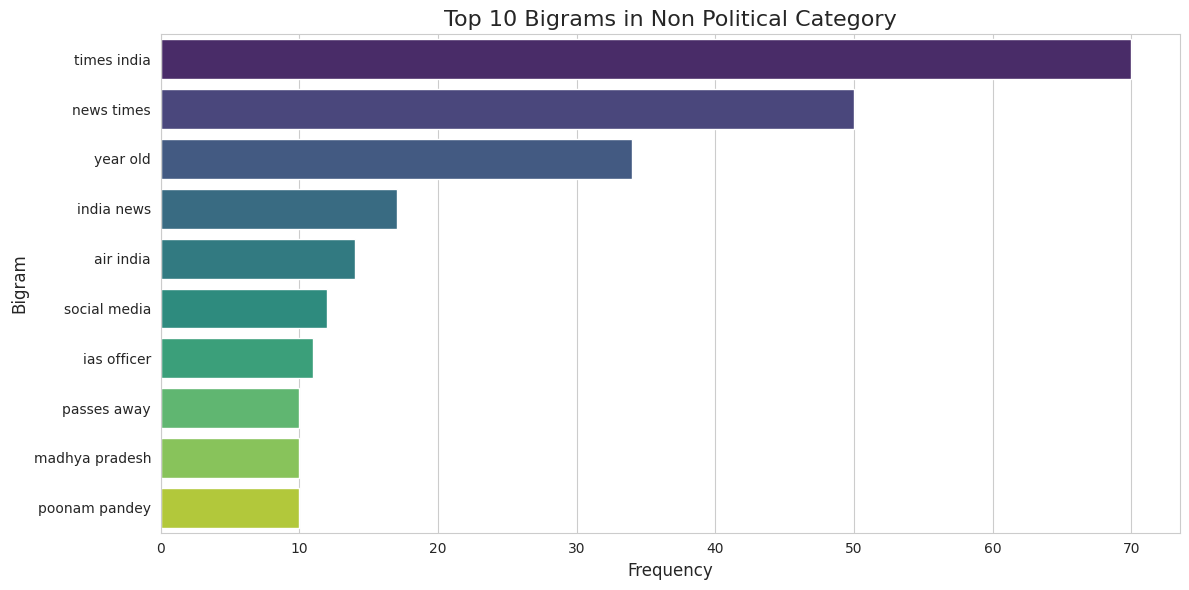

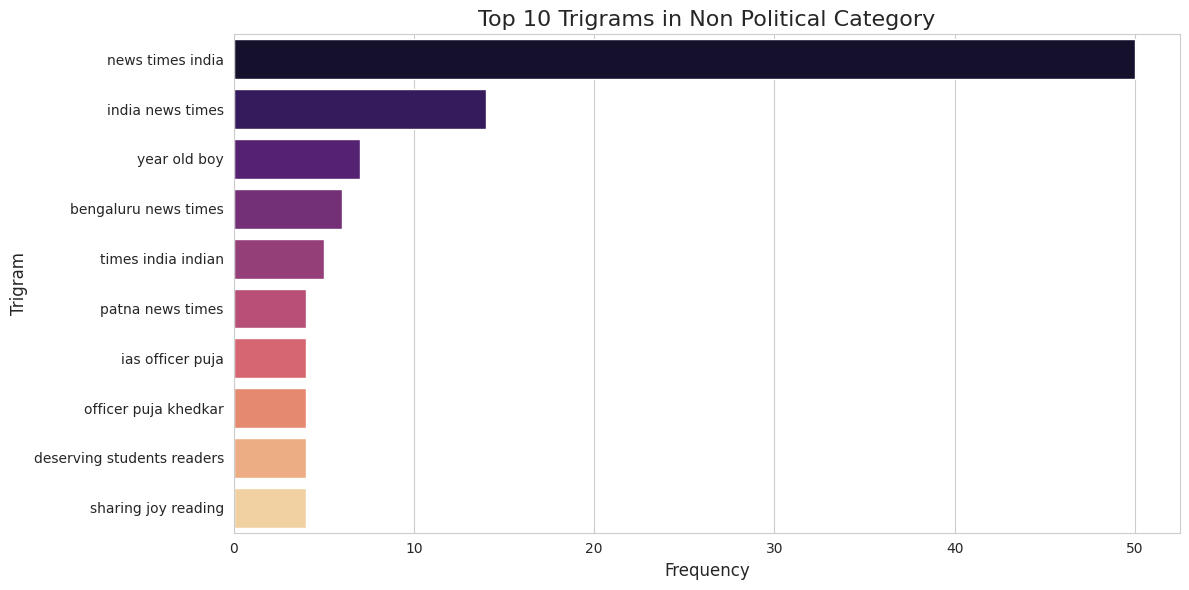

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for category, ngrams_data in category_ngram_data.items():
    # Топ 10 биграмм
    bigram_df_category = ngrams_data['bigrams']
    plt.figure(figsize=(12, 6))
    sns.barplot(x='frequency', y='bigram', data=bigram_df_category, palette='viridis', hue='bigram', legend=False)
    plt.title(f'Top 10 Bigrams in {category} Category', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Bigram', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Топ 10 триграмм
    trigram_df_category = ngrams_data['trigrams']
    plt.figure(figsize=(12, 6))
    sns.barplot(x='frequency', y='trigram', data=trigram_df_category, palette='magma', hue='trigram', legend=False)
    plt.title(f'Top 10 Trigrams in {category} Category', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Trigram', fontsize=12)
    plt.tight_layout()
    plt.show()
